Creating a jupyter notebook file to run the data processing/feature engineering commands

In [439]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler


In [440]:
product_catalog_df = pd.read_csv("C:\\data\\Work\\data\\product_catalog_new.csv")

In [441]:
product_catalog_df

,Product ID,Product Name,Category,Material,Size,Special_features,Customer Type,Price,Payment Type,Sellable Online,Sales Volume,Return Rate,Storage Cost,Seasonality Score,Implicit Feedback
0,1,Kitchen Pantry Shelf,Kitchen & Dining,Wood,Medium,Durable,Member,2530.23,Debit Card,Yes,217,15.11,171.65,4,Positive
1,2,Ottoman Storage Bench,Storage & Organization,Fabric,Large,Foldable,Normal,1784.65,Debit Card,Yes,698,9.15,143.67,3,Positive
2,3,Rustic Bookshelf,Storage & Organization,Wood,Large,Durable,Member,1325.18,Credit Card,Yes,973,15.78,32.06,4,Neutral
3,4,Rattan Armchair,Sofas & Seating,Velvet,Medium,Durable,Member,1789.55,Cash on Delivery,No,201,6.42,171.89,3,Negative
4,5,Glass Dining Table,Tables,Glass,Large,Durable,Normal,1915.92,Debit Card,No,932,16.26,118.37,7,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Kitchen Pantry Shelf,Kitchen & Dining,Wood,Large,Ergonomic,Member,2129.87,Credit Card,Yes,219,19.09,131.49,10,Neutral
96,97,Garden Lounge Bench,Outdoor Furniture,Wood,Medium,Waterproof,Member,3011.10,Credit Card,Yes,806,7.79,144.57,10,Positive
97,98,Queen Bed with Storage,Bedroom Furniture,Wood,Medium,Minimalist,Member,999.36,Credit Card,No,71,17.95,149.06,8,Positive
98,99,Compact Shoe Rack,Storage & Organization,Plastic,Small,Durable,Normal,3186.13,Cash on Delivery,Yes,749,2.73,116.02,5,Positive


In [442]:
#Describing the dataset 

product_catalog_df.describe 

<bound method NDFrame.describe of     Product ID            Product Name                Category Material  \
0            1    Kitchen Pantry Shelf        Kitchen & Dining     Wood   
1            2   Ottoman Storage Bench  Storage & Organization   Fabric   
2            3        Rustic Bookshelf  Storage & Organization     Wood   
3            4         Rattan Armchair         Sofas & Seating   Velvet   
4            5      Glass Dining Table                  Tables    Glass   
..         ...                     ...                     ...      ...   
95          96    Kitchen Pantry Shelf        Kitchen & Dining     Wood   
96          97     Garden Lounge Bench       Outdoor Furniture     Wood   
97          98  Queen Bed with Storage       Bedroom Furniture     Wood   
98          99       Compact Shoe Rack  Storage & Organization  Plastic   
99         100    Large Wooden Dresser       Bedroom Furniture     Wood   

      Size Special_features Customer Type    Price      Payment T

In [443]:
#Checking the column names 

column_list=(list(product_catalog_df.columns)) 

print(column_list) 

 

['Product ID', 'Product Name', 'Category', 'Material', 'Size', 'Special_features', 'Customer Type', 'Price', 'Payment Type', 'Sellable Online', 'Sales Volume', 'Return Rate', 'Storage Cost', 'Seasonality Score', 'Implicit Feedback']


In [444]:
#Checking the number of products in the dataset 

print(product_catalog_df["Product Name"].nunique()) 

30


In [445]:
#Observing the different types of data 

 

print("=============================================") 

print("Data types of the columns in the data frame:", product_catalog_df.dtypes) 

print("=============================================") 

print("Shape of the data frame:", product_catalog_df.shape) 

print("=============================================") 

print("Information about the data frame:", product_catalog_df.info()) 

product_catalog_df.head() 

Data types of the columns in the data frame: Product ID             int64
Product Name          object
Category              object
Material              object
Size                  object
Special_features      object
Customer Type         object
Price                float64
Payment Type          object
Sellable Online       object
Sales Volume           int64
Return Rate          float64
Storage Cost         float64
Seasonality Score      int64
Implicit Feedback     object
dtype: object
Shape of the data frame: (100, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product ID         100 non-null    int64  
 1   Product Name       100 non-null    object 
 2   Category           100 non-null    object 
 3   Material           100 non-null    object 
 4   Size               100 non-null    object 
 5   Special_features   100 non

,Product ID,Product Name,Category,Material,Size,Special_features,Customer Type,Price,Payment Type,Sellable Online,Sales Volume,Return Rate,Storage Cost,Seasonality Score,Implicit Feedback
0,1,Kitchen Pantry Shelf,Kitchen & Dining,Wood,Medium,Durable,Member,2530.23,Debit Card,Yes,217,15.11,171.65,4,Positive
1,2,Ottoman Storage Bench,Storage & Organization,Fabric,Large,Foldable,Normal,1784.65,Debit Card,Yes,698,9.15,143.67,3,Positive
2,3,Rustic Bookshelf,Storage & Organization,Wood,Large,Durable,Member,1325.18,Credit Card,Yes,973,15.78,32.06,4,Neutral
3,4,Rattan Armchair,Sofas & Seating,Velvet,Medium,Durable,Member,1789.55,Cash on Delivery,No,201,6.42,171.89,3,Negative
4,5,Glass Dining Table,Tables,Glass,Large,Durable,Normal,1915.92,Debit Card,No,932,16.26,118.37,7,Positive


In [446]:
#Checking missing values 

print(product_catalog_df.isnull().sum()) 

Product ID           0
Product Name         0
Category             0
Material             0
Size                 0
Special_features     0
Customer Type        0
Price                0
Payment Type         0
Sellable Online      0
Sales Volume         0
Return Rate          0
Storage Cost         0
Seasonality Score    0
Implicit Feedback    0
dtype: int64


In [447]:
#Checking for duplicates 

print("Product Catalog Duplicates:", product_catalog_df.duplicated().sum()) 

Product Catalog Duplicates: 0



--- Checking Outliers (Boxplot) ---


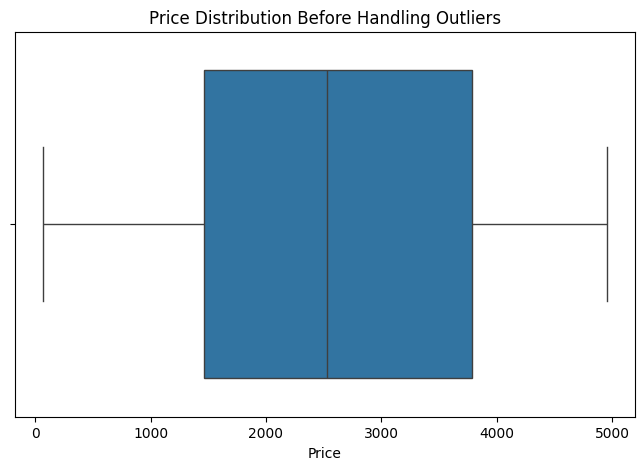

In [448]:
#Checking outliers 

print("\n--- Checking Outliers (Boxplot) ---") 

plt.figure(figsize=(8,5)) 

sns.boxplot(x=product_catalog_df["Price"]) 

plt.title("Price Distribution Before Handling Outliers") 

plt.show() 

In [449]:
#Standardizing categorical data 

categorical_cols = [ "Payment Type"] 

for col in categorical_cols: 

    if col in product_catalog_df.columns: 

        product_catalog_df[col] = product_catalog_df[col].str.lower().str.strip() 

In [450]:
#map sellable online to 0 and 1 

if "Sellable Online" in product_catalog_df.columns: 

    product_catalog_df["Sellable Online"] = product_catalog_df["Sellable Online"].replace({"Yes": 1, "No": 0}).astype(int) 

 

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_2572\3629431867.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  product_catalog_df["Sellable Online"] = product_catalog_df["Sellable Online"].replace({"Yes": 1, "No": 0}).astype(int)


In [451]:
# Scaling only selected numerical columns 

scaled_cols = ["Price", "Return Rate", "Storage Cost"] 

if "Seasonality Score" in product_catalog_df.columns:  # Checking if it exists 

    scaled_cols.append("Seasonality Score") 

In [452]:
 

 #Convert data types 

convert_types = { 

    "Price": float, 

    "Sales Volume": int,  

    "Return Rate": float, 

    "Storage Cost": float 

} 


for col, dtype in convert_types.items(): 

    if col in product_catalog_df.columns: 

        product_catalog_df[col] = pd.to_numeric(product_catalog_df[col], errors='coerce').astype(dtype) 

 

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_2572\2102551504.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=product_catalog_df["Category"], y=product_catalog_df["Sales Volume"], ci=None)


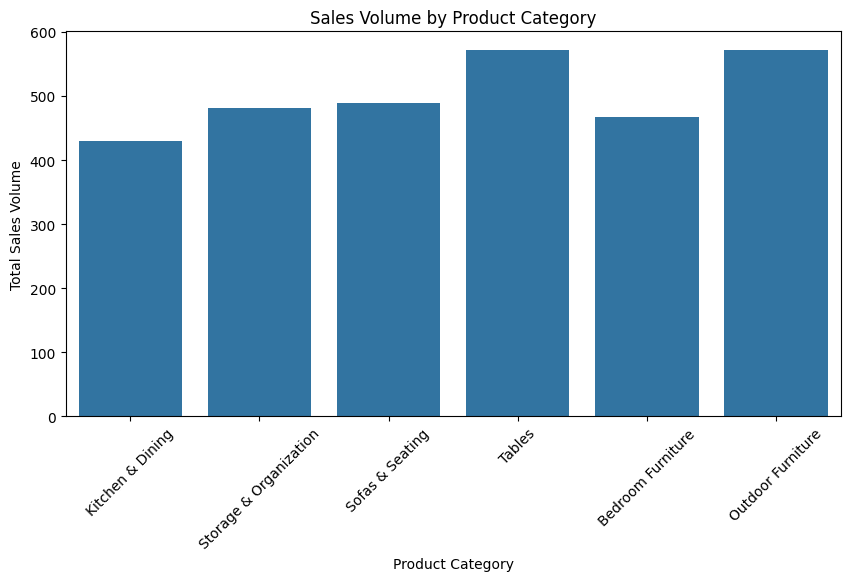

In [453]:
#Bar plot for products vs sales 

plt.figure(figsize=(10,5)) 

sns.barplot(x=product_catalog_df["Category"], y=product_catalog_df["Sales Volume"], ci=None) 

plt.xticks(rotation=45) 

plt.title("Sales Volume by Product Category") 

plt.xlabel("Product Category") 

plt.ylabel("Total Sales Volume") 

plt.show() 

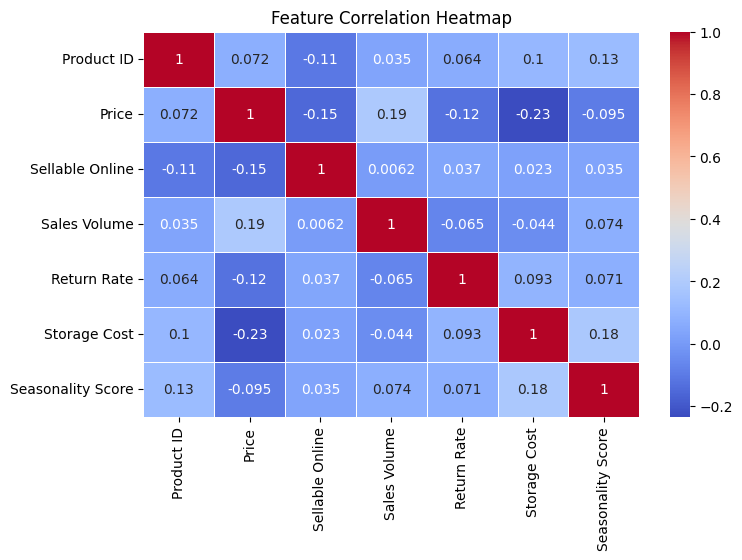

In [454]:
# Select only numerical columns for correlation 

numeric_data = product_catalog_df.select_dtypes(include=["number"]) 

 

# Generate heatmap 

plt.figure(figsize=(8,5)) 

sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", linewidths=0.5) 

plt.title("Feature Correlation Heatmap") 

plt.show() 

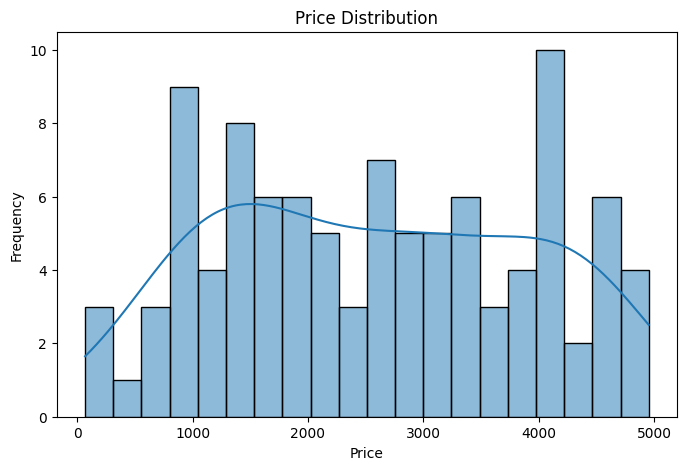

In [455]:
#return rate 

plt.figure(figsize=(8,5)) 

sns.histplot(product_catalog_df["Price"], bins=20, kde=True) 

plt.title("Price Distribution") 

plt.xlabel("Price") 

plt.ylabel("Frequency") 

plt.show() 

Text(0, 0.5, '')

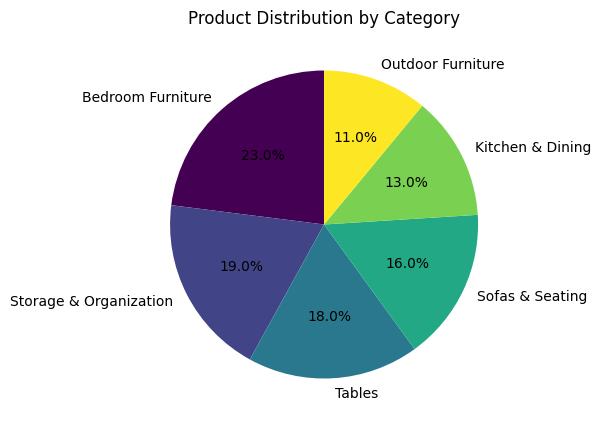

In [456]:
#product distribution 

plt.figure(figsize=(8,5)) 

product_catalog_df["Category"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, cmap="viridis") 

plt.title("Product Distribution by Category") 

plt.ylabel("")  

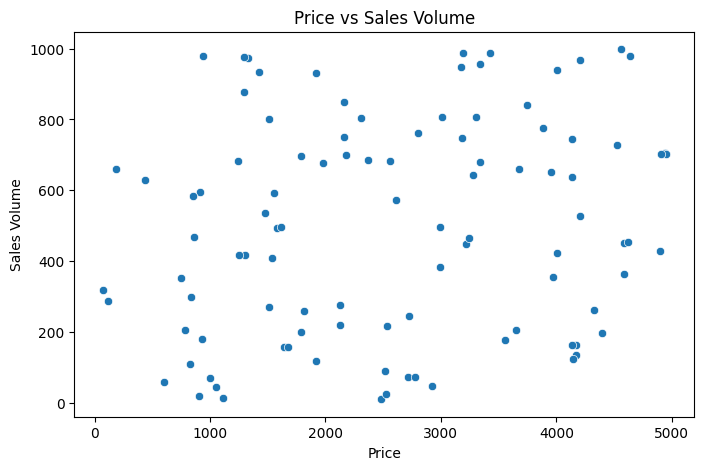

In [457]:
#scatter plot 

plt.figure(figsize=(8,5)) 

sns.scatterplot(x=product_catalog_df["Price"], y=product_catalog_df["Sales Volume"]) 

plt.title("Price vs Sales Volume") 

plt.xlabel("Price") 

plt.ylabel("Sales Volume") 

plt.show() 

Feature Engineering

In [458]:
# Creating Sales_to_Return_Ratio 

product_catalog_df["Sales_to_Return_Ratio"] = product_catalog_df["Sales Volume"] / (product_catalog_df["Return Rate"] + 1)   

 

In [459]:
# Creating Revenue per product 

product_catalog_df["Revenue_Per_Product"] = product_catalog_df["Sales Volume"] * product_catalog_df["Price"] 

 

In [460]:
#calculating the online sellability score 

product_catalog_df["Online_Sellability_Score"] = product_catalog_df["Sellable Online"] * product_catalog_df["Sales Volume"] / (product_catalog_df["Sales Volume"].max() + 1) 

 

In [461]:
# Check if it was calculated correctly 

print("\n Unique values in 'Online Sellability Score':") 

print(product_catalog_df["Online_Sellability_Score"].unique()) 

 


 Unique values in 'Online Sellability Score':
[0.21721722 0.6986987  0.97397397 0.         0.7017017  0.31931932
 0.12012012 0.97997998 0.70670671 0.17717718 0.7037037  0.1981982
 0.75175175 0.74474474 0.05905906 0.07507508 0.46846847 0.57457457
 0.49449449 0.35235235 0.01501502 0.62862863 0.28728729 0.85085085
 0.02002002 0.59459459 0.15915916 0.16316316 0.01101101 0.58358358
 0.8018018  0.04804805 0.20620621 0.45445445 0.43043043 0.66066066
 0.68568569 0.95795796 0.97597598 0.998999   0.26226226 0.93893894
 0.87787788 0.09109109 0.94994995 0.46746747 0.42342342 0.40840841
 0.98798799 0.4984985  0.41841842 0.53553554 0.18018018 0.35535536
 0.21921922 0.80680681 0.74974975 0.04504505]


In [462]:
print(product_catalog_df[["Sellable Online", "Sales Volume", "Online_Sellability_Score"]].head(20))


    Sellable Online  Sales Volume  Online_Sellability_Score
0                 1           217                  0.217217
1                 1           698                  0.698699
2                 1           973                  0.973974
3                 0           201                  0.000000
4                 0           932                  0.000000
5                 1           701                  0.701702
6                 1           319                  0.319319
7                 1           120                  0.120120
8                 0           679                  0.000000
9                 1           979                  0.979980
10                1           706                  0.706707
11                0           452                  0.000000
12                1           177                  0.177177
13                1           703                  0.703704
14                1           198                  0.198198
15                1           979       

In [463]:
 

# Creating Storage Efficiency Score 

product_catalog_df["Storage_Efficiency_Score"] = product_catalog_df["Revenue_Per_Product"] / (product_catalog_df["Storage Cost"] + 1) 

 

In [464]:
 

# High Demand Indicator (Top 25% best-selling products) 

threshold_sales = product_catalog_df["Sales Volume"].quantile(0.75) 

product_catalog_df["High_Demand_Indicator"] = np.where(product_catalog_df["Sales Volume"] >= threshold_sales, 1, 0) 

 

In [465]:
# Convert Implicit Feedback to numeric values 

feedback_mapping = {"Positive": 1, "Neutral": 0, "Negative": -1} 

product_catalog_df["Implicit_Feedback_Score"] = product_catalog_df["Implicit Feedback"].map(feedback_mapping) 

 

In [466]:
# Define Top Rated based on positive implicit feedback 

product_catalog_df["Top_Rated"] = np.where(product_catalog_df["Implicit_Feedback_Score"] > 0, 1, 0) 

In [467]:
# Likelihood of Purchase (How likely a product is to be purchased) 

total_sales = product_catalog_df["Sales Volume"].sum() 

product_catalog_df["Likelihood_of_Purchase"] = product_catalog_df["Sales Volume"] / (total_sales + 1) 

In [468]:
 

# Implicit Feedback Score (Using numerical mapping for customer engagement) 

product_catalog_df["Customer_Interest_Score"] = product_catalog_df["Implicit_Feedback_Score"] 

In [469]:
# Expert Judgment Score (A weighted score for business impact) 

product_catalog_df["Expert_Judgment_Score"] = ( 

    (product_catalog_df["High_Demand_Indicator"] * 1) + 

    (product_catalog_df["Top_Rated"] * 1) + 

    (product_catalog_df["Revenue_Per_Product"] > product_catalog_df["Revenue_Per_Product"].median()) * 1 

) 

 

In [471]:
# Ensure all numerical columns are correctly formatted 

numerical_features = ["Sales_to_Return_Ratio", "Revenue_Per_Product", "Storage_Efficiency_Score", "Online_Sellability_Score", "Likelihood_of_Purchase", "Customer_Interest_Score"] 

In [472]:
# Convert columns to float for accurate visualizations 

for col in numerical_features: 

    product_catalog_df[col] = pd.to_numeric(product_catalog_df[col], errors='coerce') 

 

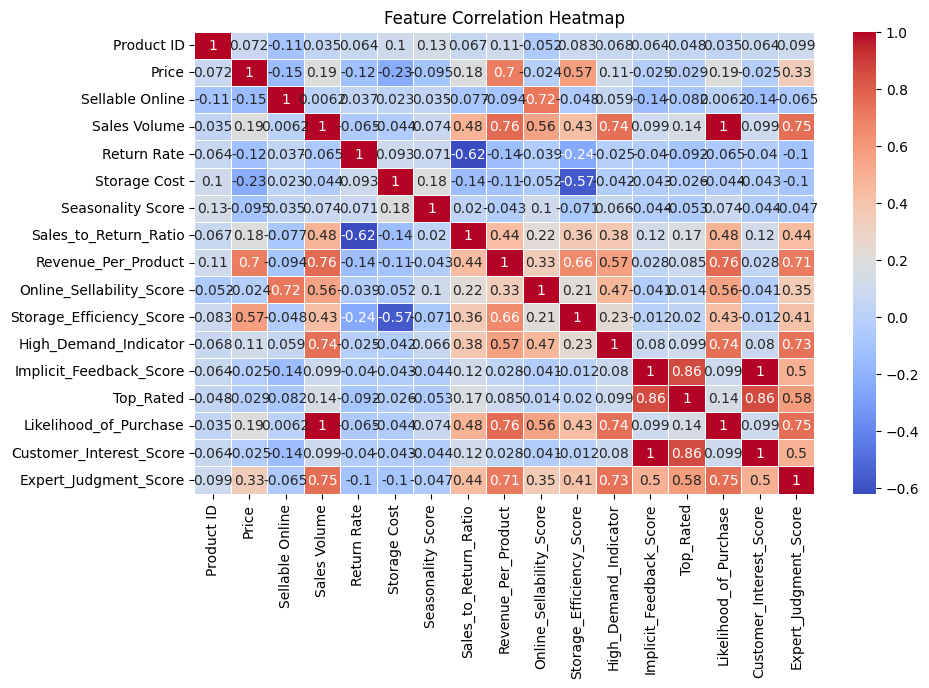

In [473]:
# Generate heatmap with updated numeric columns 

numeric_product_catalog_df = product_catalog_df.select_dtypes(include=[np.number]) 

plt.figure(figsize=(10, 6)) 

sns.heatmap(numeric_product_catalog_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5) 

plt.title("Feature Correlation Heatmap") 

plt.show() 

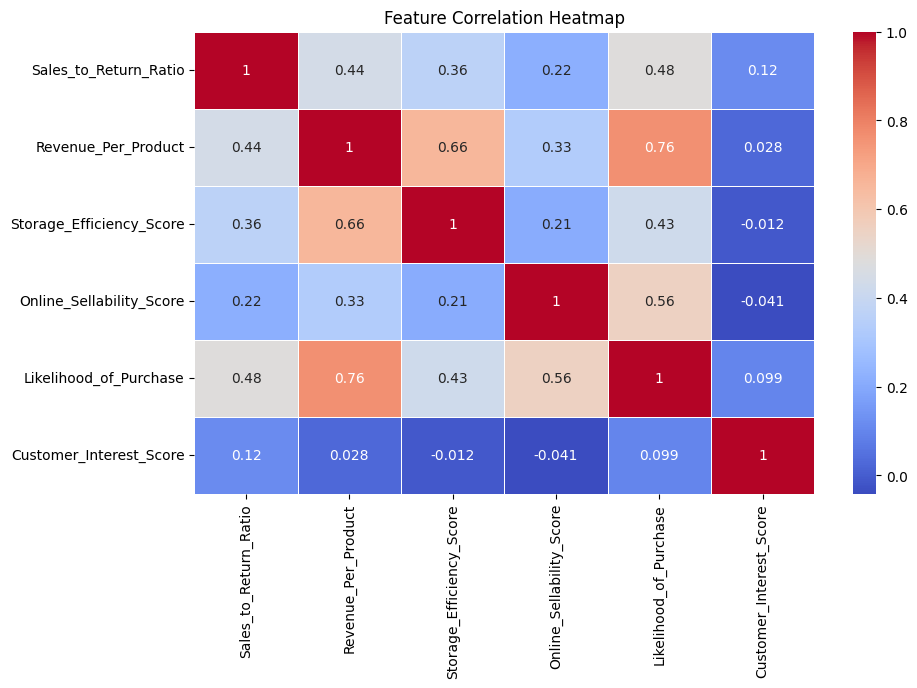

In [474]:
# 1️⃣ Feature Correlation Heatmap 

plt.figure(figsize=(10, 6)) 

sns.heatmap(product_catalog_df[numerical_features].corr(), annot=True, cmap="coolwarm", linewidths=0.5) 

plt.title("Feature Correlation Heatmap") 

plt.show() 

 

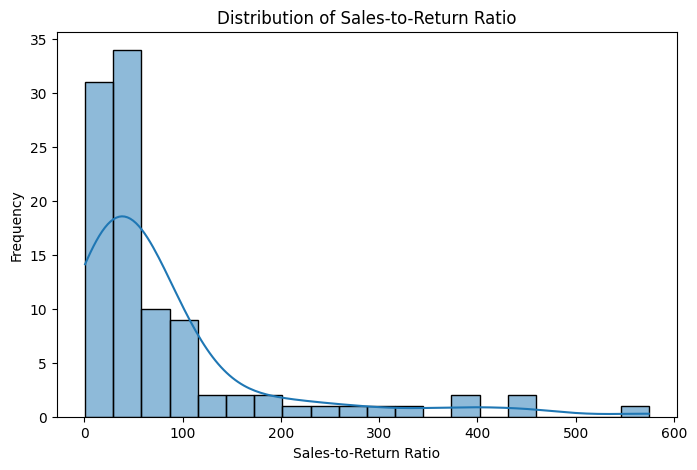

In [475]:
# Histogram 

plt.figure(figsize=(8, 5)) 

sns.histplot(product_catalog_df["Sales_to_Return_Ratio"], bins=20, kde=True) 

plt.title("Distribution of Sales-to-Return Ratio") 

plt.xlabel("Sales-to-Return Ratio") 

plt.ylabel("Frequency") 

plt.show() 

 

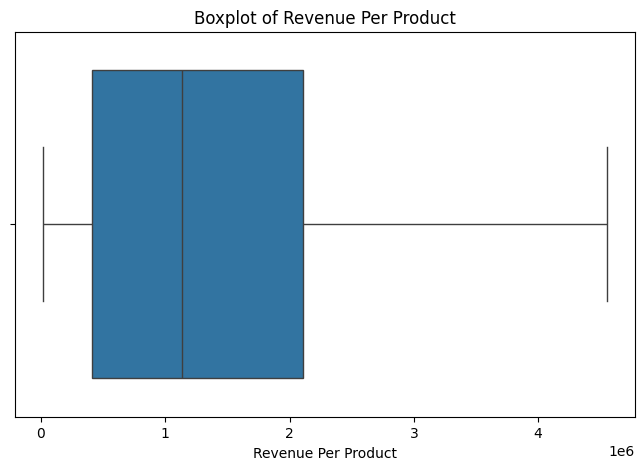

In [476]:
# Box Plot 

plt.figure(figsize=(8, 5)) 

sns.boxplot(x=product_catalog_df["Revenue_Per_Product"]) 

plt.title("Boxplot of Revenue Per Product") 

plt.xlabel("Revenue Per Product") 

plt.show() 

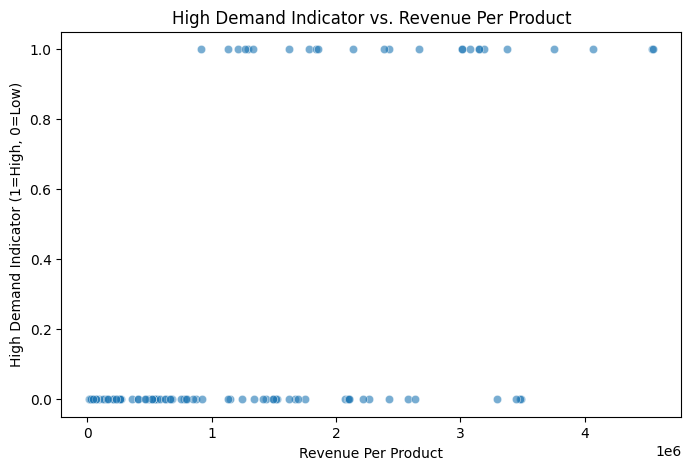

In [477]:
# Scatter Plot 

plt.figure(figsize=(8, 5)) 

sns.scatterplot(x=product_catalog_df["Revenue_Per_Product"], y=product_catalog_df["High_Demand_Indicator"], alpha=0.6) 

plt.title("High Demand Indicator vs. Revenue Per Product") 

plt.xlabel("Revenue Per Product") 

plt.ylabel("High Demand Indicator (1=High, 0=Low)") 

plt.show() 

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_2572\4121275398.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=product_catalog_df["Top_Rated"], palette="coolwarm")


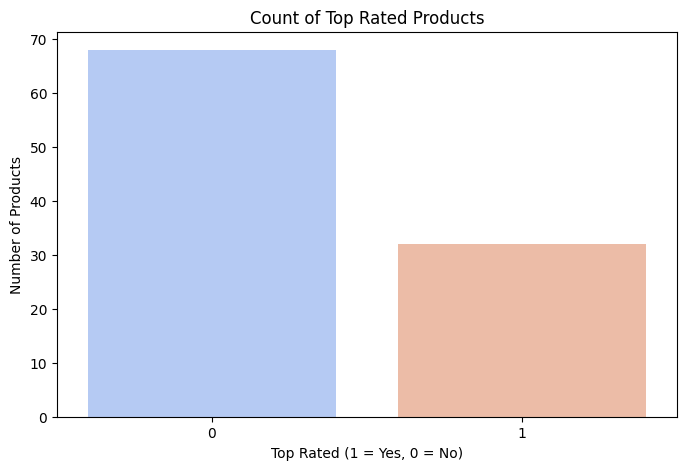

In [478]:
# Bar chart for top-rated products 

plt.figure(figsize=(8, 5)) 

sns.countplot(x=product_catalog_df["Top_Rated"], palette="coolwarm") 

plt.title("Count of Top Rated Products") 

plt.xlabel("Top Rated (1 = Yes, 0 = No)") 

plt.ylabel("Number of Products") 

plt.show() 

In [ ]:
#print("Unique values in 'Sales Volume':", product_catalog_df["Sales Volume"].unique())

Unique values in 'Sales Volume': [217 698 973 201 932 701 319 120 679 979 706 452 177 703 198 135 761 751
 744 300  59  75 468 163 574 494 352  15 628 287 850  20 594 159 968 448
 652 418 642 676  11 271 583 684 801  48 111 206 364 454 125 430 527 660
 385 685 776 592  73 987 957  26 975 998 933 702 205 262 276 938 157 877
  91 949 840 467 261 423 408 498 804 659 245 535 180 806 727 355 637 219
  71 749  45]


In [ ]:
#print(product_catalog_df["Sales Volume"].nunique())

93


In [ ]:
#print(product_catalog_df["Sellable Online"].unique())


[1 0]
